In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Base_dados = pd.read_csv("Documents\CSVs\Startups+in+2021+end.csv")

In [3]:
Base_dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [4]:
Base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        936 non-null    int64 
 1   Company           936 non-null    object
 2   Valuation ($B)    936 non-null    object
 3   Date Joined       936 non-null    object
 4   Country           936 non-null    object
 5   City              921 non-null    object
 6   Industry          936 non-null    object
 7   Select Investors  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [5]:
Base_dados.isna().sum()

Unnamed: 0           0
Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                15
Industry             0
Select Investors     1
dtype: int64

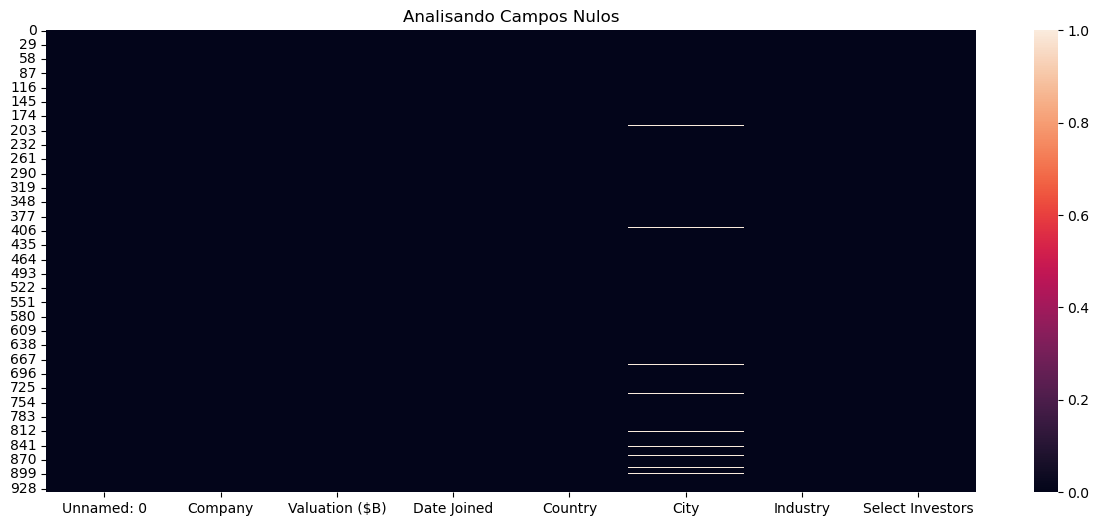

In [6]:
plt.figure(figsize=(15,6))
plt.title("Analisando Campos Nulos")
sns.heatmap(Base_dados.isnull() );

In [7]:
Base_dados.nunique()

Unnamed: 0          936
Company             935
Valuation ($B)      192
Date Joined         589
Country              47
City                239
Industry             17
Select Investors    920
dtype: int64

In [8]:
Base_dados.Industry.unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [9]:
Base_dados['Industry'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [10]:
Base_dados['Industry'].value_counts(normalize=True).mul(100).round(2)

Fintech                                20.30
Internet software & services           17.84
E-commerce & direct-to-consumer        10.90
Artificial intelligence                 7.37
Health                                  6.73
Supply chain, logistics, & delivery     5.45
Other                                   5.45
Cybersecurity                           4.38
Mobile & telecommunications             3.95
Data management & analytics             3.85
Hardware                                3.42
Auto & transportation                   3.10
Edtech                                  2.88
Consumer & retail                       2.46
Travel                                  1.39
Artificial Intelligence                 0.43
Finttech                                0.11
Name: Industry, dtype: float64

In [11]:
Base_dados['Industry'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Industry, dtype: int64

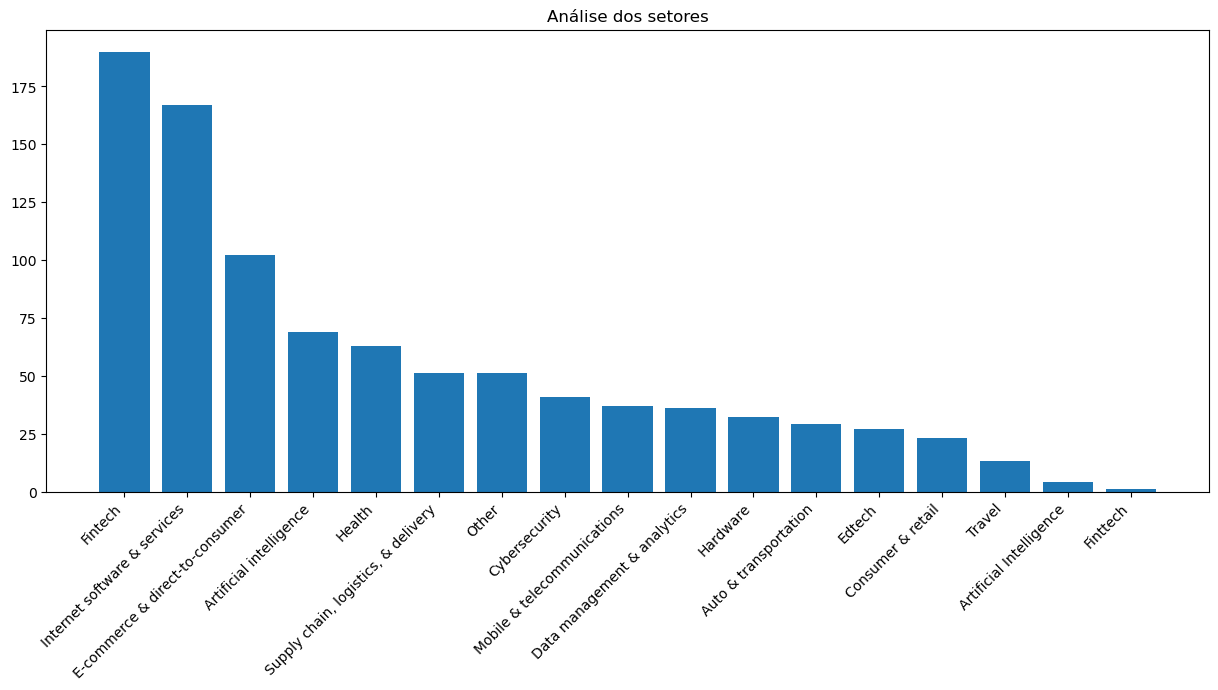

In [12]:
plt.figure(figsize=(15,6))

plt.title('Análise dos setores')

plt.bar(Base_dados['Industry'].value_counts().index , Base_dados['Industry'].value_counts())

plt.xticks(rotation=45, ha='right');


In [13]:
pizza = round(Base_dados['Country'].value_counts(normalize=True)*100,2)

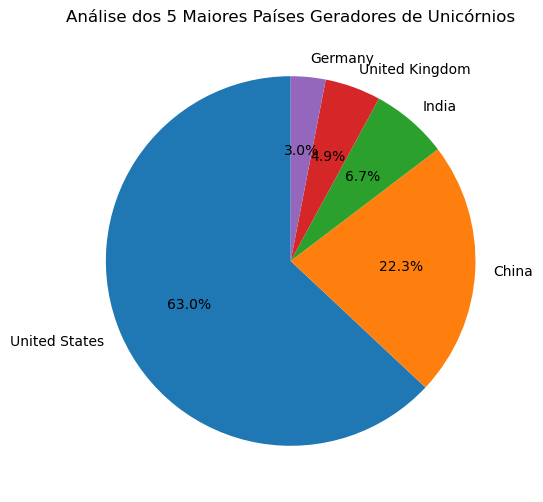

In [14]:
plt.figure(figsize=(15,6))
plt.title('Análise dos 5 Maiores Países Geradores de Unicórnios')
plt.pie(
    pizza.head(5), # os 5 maiores 
    labels= pizza.index[0:5],
    shadow=False,
    startangle=90,
    autopct='%1.1f%%'
);

In [15]:
Base_dados['Date Joined']=pd.to_datetime(Base_dados['Date Joined'])

In [16]:
Base_dados['Date Joined']

0     2017-04-07
1     2012-12-01
2     2014-01-23
3     2011-12-12
4     2018-01-08
         ...    
931   2021-12-06
932   2021-12-07
933   2021-12-01
934   2021-12-01
935   2021-12-07
Name: Date Joined, Length: 936, dtype: datetime64[ns]

In [17]:
Base_dados['Month'] = pd.DatetimeIndex(Base_dados['Date Joined']).month
Base_dados['Year'] = pd.DatetimeIndex(Base_dados['Date Joined']).year

In [18]:
Base_dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Month,Year
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [19]:
Base_dados.rename(columns={'Unnamed: 0': 'Id'},inplace=True)

In [20]:
Analise_Agrupada = Base_dados.groupby(
    by=['Country','Year','Month','Company']
).count()['Id'].reset_index()

In [21]:
Analise_Agrupada

,Country,Year,Month,Company,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [22]:
Analise_Agrupada.loc[
    Analise_Agrupada['Country']=='Brazil'
]

,Country,Year,Month,Company,Id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [25]:
Base_dados['Valuation ($B)']= pd.to_numeric(
    Base_dados['Valuation ($B)'].apply(
        lambda x: x.replace('$', '')
    )
)

In [26]:
Base_dados.groupby(
    by=['Country','Industry']
).sum()

Id  Valuation ($B)  \
Country        Industry                                                     
Argentina      Fintech                                298            2.45   
Australia      E-commerce & direct-to-consumer        935            1.00   
               Fintech                                117            5.50   
               Internet software & services          1849           44.10   
Austria        Edtech                                 443            1.70   
...                                                   ...             ...   
United States  Other                                11179          187.30   
               Supply chain, logistics, & delivery   9463           67.78   
               Travel                                 645            8.55   
United States, Health                                 899            1.00   
Vietnam        Internet software & services           253            3.00   

                                                    Month   Year  
Country        Industry                                           
Argentina      Fintech                                  8   2021  
Australia      E-commerce & direct-to-consumer         12   2021  
               Fintech                                  3   2019  
               Internet software & services            20   8081  
Austria        Edtech                                   6   2021  
...                                                   ...    ...  
United States  Other                                  149  52508  
               Supply chain, logistics, & delivery    135  36354  
               Travel                                  18   4037  
United States, Health                                   9   2021  
Vietnam        Internet software & services            10   2021  

[183 rows x 4 columns]

In [29]:
analise_pais = Base_dados.groupby(
    by=['Country']
).sum()['Valuation ($B)'].reset_index()

In [31]:
analise_valor = analise_pais.sort_values('Valuation ($B)', ascending=False)

In [39]:
analise_valor_top10=analise_valor.head(10)

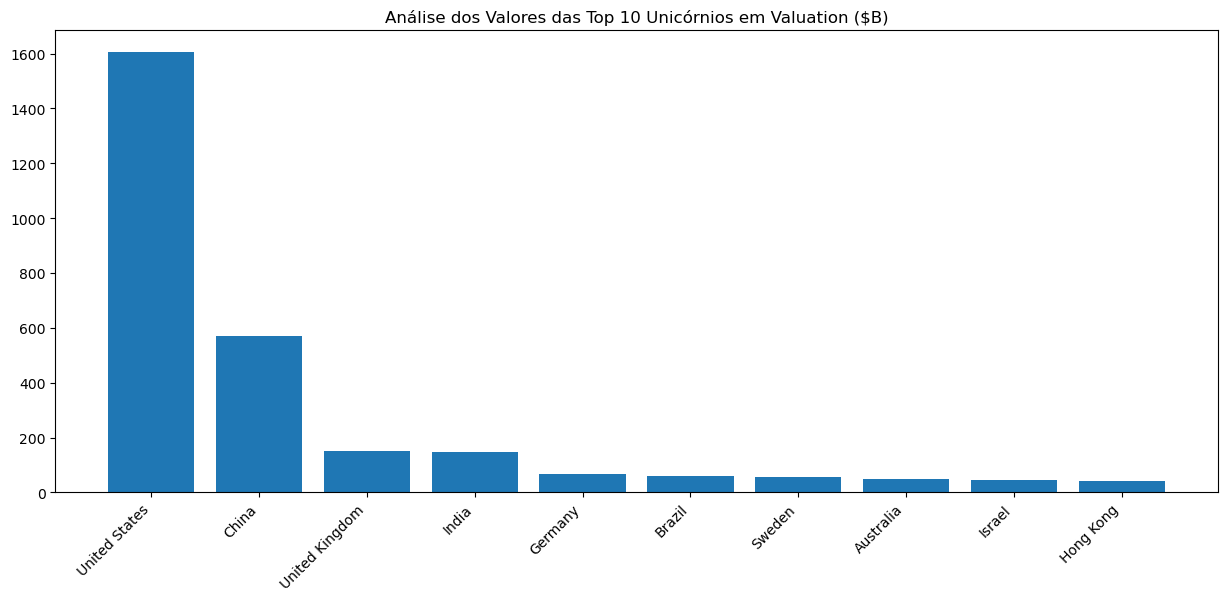

In [44]:
plt.figure(figsize=(15,6))

plt.title('Análise dos Valores das Top 10 Unicórnios em Valuation ($B)')

plt.bar( analise_valor_top10['Country'], analise_valor_top10['Valuation ($B)'])

plt.xticks(rotation=45, ha='right');

